# Samples SRM

## Import libraries

In [1]:
#!pip install statsmodels

In [2]:
#!pip install ssrm_test

In [3]:
#!pip install matplotlib

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chisquare
from ssrm_test import ssrm_test

## Importing data

In [5]:
df1 = pd.read_csv('homework_task_2.csv')

In [6]:
df1.sample(5)

,passport_id,region,platform,user_type_cars_name,number_ads,revenue
93853,136311897,Краснодар,android,cars_simple,1,0
3465,142027480,Новосибирск,android,cars_simple,1,0
90283,143716722,Уфа,android,cars_simple,2,0
18125,132765378,Екатеринбург,ios,cars_simple,1,0
115774,123570119,Уфа,android,cars_simple,1,0


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136584 entries, 0 to 136583
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   passport_id          136584 non-null  int64 
 1   region               133114 non-null  object
 2   platform             133114 non-null  object
 3   user_type_cars_name  130112 non-null  object
 4   number_ads           136584 non-null  int64 
 5   revenue              136584 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 6.3+ MB


In [8]:
df1.isna().sum()

passport_id               0
region                 3470
platform               3470
user_type_cars_name    6472
number_ads                0
revenue                   0
dtype: int64

In [9]:
df2 = pd.read_csv('homework_task_3.csv')

In [10]:
df2.sample(5)

,Unnamed: 0,passport_id,region,platform,user_type_cars_name,number_ads,revenue,vas,combined,combined_weight,group
17052,110104,143056236,Ростов-на-Дону,android,cars_simple,2,550,1,"('Ростов-на-Дону', 'android', 'cars_simple', 1)",0.000007,['B']
24391,43113,142257960,Тольятти,ios,cars_simple,1,0,0,"('Тольятти', 'ios', 'cars_simple', 0)",0.000007,['B']
10044,86416,133278367,Москва,ios,cars_simple,1,0,0,"('Москва', 'ios', 'cars_simple', 0)",0.000007,['B']
10387,119582,137588243,Москва,ios,cars_simple,1,500,1,"('Москва', 'ios', 'cars_simple', 1)",0.000007,['B']
13740,50228,138262429,Новосибирск,android,cars_simple,1,0,0,"('Новосибирск', 'android', 'cars_simple', 0)",0.000007,['B']


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26018 entries, 0 to 26017
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           26018 non-null  int64  
 1   passport_id          26018 non-null  int64  
 2   region               26018 non-null  object 
 3   platform             26018 non-null  object 
 4   user_type_cars_name  26018 non-null  object 
 5   number_ads           26018 non-null  int64  
 6   revenue              26018 non-null  int64  
 7   vas                  26018 non-null  int64  
 8   combined             26018 non-null  object 
 9   combined_weight      26018 non-null  float64
 10  group                26018 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 2.2+ MB


## Tasks

### Task 1.

 **Divide users into two groups based on revenue size: paying (revenue > 0) and non-paying (revenue = 0). Add this information to a new column called 'vas'. Find the average share of paying users across the entire dataset.**

In [12]:
df1.dropna(inplace=True)

In [13]:
bins = [float('-inf'), 0, float('inf')]
names = ['non-paying', 'paying']

df1['vas'] = pd.cut(df1['revenue'], bins, labels=names)

In [14]:
df1

,passport_id,region,platform,user_type_cars_name,number_ads,revenue,vas
0,144161634,Санкт-Петербург,android,cars_seller,2,1080,paying
1,132683716,Калининград,android,cars_simple,1,190,paying
2,142653188,Санкт-Петербург,android,cars_seller,1,0,non-paying
3,124199631,Казань,android,cars_simple,1,190,paying
4,144045240,Казань,android,cars_simple,1,0,non-paying
...,...,...,...,...,...,...,...
136579,144374570,Москва,android,cars_simple,2,1080,paying
136580,144245434,Омск,android,cars_simple,1,190,paying
136581,134759767,Самара,ios,cars_simple,1,580,paying
136582,123856725,Москва,ios,cars_simple,2,0,non-paying


In [15]:
df1.vas.value_counts(normalize=True)

paying        0.52265
non-paying    0.47735
Name: vas, dtype: float64

### Task 2.  

**Get a stratified sample of five thousand users using the alternative weights method.
The sample must be stratified according to the following parameters: `['region', 'platform', 'user_type_cars_name', 'vas']`, preserving the ratios from the original dataset. When forming a stratified sample, use np.random.seed(1) to ensure that everyone has the same dataset.**

In [16]:
np.random.seed(1)


# setting required sample size
sample_size = 5000

def population_sample_parameter(dataset, column):
    '''Function determines the proportion of values for the selected parameter in the full dataset'''
    print(column)
    print(dataset[column].value_counts(normalize = True).to_string())
    print('-------------')


print('The proportion of parameter values in the full dataset:')
parameter_list = ['region', 'platform', 'user_type_cars_name', 'vas']
for step in parameter_list:
    population_sample_parameter(df1, step)


# We will form a sample of 5,000 users, 
# based on the condition that the parameters are represented in the same ratio 
# as for the full dataset 
df1['combined'] = (
    list(zip(df1['vas'],
             df1['platform'],
             df1['region'],
             df1['user_type_cars_name']))
) # We form a column with a combination of target parameters

weight = df1['combined'].value_counts(normalize=True)
counts = df1['combined'].value_counts()

# We calculate the weight of each combination, according to which the sample will be sampled
df1['combined_weight'] = df1['combined'].apply(lambda x: weight[x]/counts[x]) 

# We sample by the weights of the parameter combinations
strat_sample_dataset_2 = df1.sample(sample_size, weights=df1['combined_weight']) 


# We will display the proportion of values for each parameter in the sample
print(f'\n\nThe proportion of parameter values in the sample of {sample_size} users:')
for step in parameter_list:
    population_sample_parameter(strat_sample_dataset_2, step)

The proportion of parameter values in the full dataset:
region
Москва             0.246580
Санкт-Петербург    0.119520
Новосибирск        0.107331
Сочи               0.087478
Екатеринбург       0.055306
Нижний Новгород    0.048758
Челябинск          0.037506
Самара             0.036914
Казань             0.034440
Ростов-на-Дону     0.032218
Красноярск         0.030036
Омск               0.026031
Уфа                0.023810
Пермь              0.023280
Воронеж            0.021712
Волгоград          0.016171
Краснодар          0.015748
Калининград        0.014564
Саратов            0.010652
Тольятти           0.008108
Ижевск             0.003835
-------------
platform
android    0.641217
ios        0.337179
desktop    0.020844
mobile     0.000761
-------------
user_type_cars_name
cars_simple    0.910692
cars_seller    0.082045
cars_dealer    0.007263
-------------
vas
paying        0.52265
non-paying    0.47735
-------------


The proportion of parameter values in the sample of 5000 users

### Task 3.

**Check the representativeness of the obtained sample for several parameters:**  
- **the parameter of non-paying users ('vas' = 0)**  

**Enter the p-value through the z-test with an accuracy of three decimal places.**

In [17]:
strat_sample_dataset_2.vas.value_counts()

paying        2595
non-paying    2405
Name: vas, dtype: int64

In [18]:
alpha = 0.05

stat, pval = proportions_ztest(count=[df1.vas.value_counts()[1], strat_sample_dataset_2.vas.value_counts()[1]],
                               nobs=[df1.shape[0], strat_sample_dataset_2.shape[0]]) # считаем точечную оценку доли для z-теста
print('Z-statistics: ', stat, '\np-value: ', pval)

if pval < alpha:
    print('SRM is detected!!!')
else:
    print('No SRM found.')

Z-statistics:  -0.5070218390940259 
p-value:  0.6121394951825216
No SRM found.


### Task 4. 

**Check the representativeness of the obtained sample for several parameters:**  
- **the parameter of non-paying users ('platform' = 'android')**  

**Enter the p-value through the z-test with an accuracy of three decimal places.**

In [19]:
strat_sample_dataset_2.platform.value_counts()

android    3210
ios        1698
desktop      89
mobile        3
Name: platform, dtype: int64

In [20]:
alpha = 0.05

stat, pval = proportions_ztest(count=[df1.platform.value_counts()[0], strat_sample_dataset_2.platform.value_counts()[0]],
                               nobs=[df1.shape[0], strat_sample_dataset_2.shape[0]]) # считаем точечную оценку доли для z-теста
print('Z-statistics: ', stat, '\np-value: ', pval)

if pval < alpha:
    print('SRM is detected!!!')
else:
    print('No SRM found.')

Z-statistics:  -0.11330780518750816 
p-value:  0.9097865294491119
No SRM found.


### Task 5. 

**Check the representativeness of the obtained sample for several parameters:**  
- **the parameter of non-paying users ('user_type_cars_name' = 'cars_seller')**  

**Enter the p-value through the z-test with an accuracy of three decimal places.**

In [21]:
strat_sample_dataset_2.user_type_cars_name.value_counts()

cars_simple    4551
cars_seller     414
cars_dealer      35
Name: user_type_cars_name, dtype: int64

In [22]:
alpha = 0.05

stat, pval = proportions_ztest(count=[df1.user_type_cars_name.value_counts()[1], strat_sample_dataset_2.user_type_cars_name.value_counts()[1]],
                               nobs=[df1.shape[0], strat_sample_dataset_2.shape[0]]) # считаем точечную оценку доли для z-теста
print('Z-statistics: ', stat, '\np-value: ', pval)

if pval < alpha:
    print('SRM is detected!!!')
else:
    print('No SRM found.')

Z-statistics:  -0.19094700238261444 
p-value:  0.8485671150224533
No SRM found.


### Task 6. 

**Let's use `df2` for this and the next tasks.  
The design of the experiment assumes that the groups are represented in equal proportions. Check for a violation of split-plot randomization (SRM) in the data using the chi-squared test.  
Is there a violation of SRM according to the chi-squared test?**

In [23]:
df2.group.value_counts()

['B']    14270
['A']    11748
Name: group, dtype: int64

In [24]:
# Amount of users in control and test groups
observed = [df2.group.value_counts()[0], df2.group.value_counts()[1]]

# desired proportion
ratio = 50

# statistical significance level
alpha = 0.05

In [25]:
total_traffic = sum(observed)

expected = [ (total_traffic * ratio)/100, (total_traffic * (100 - ratio)/100) ] # ожидаемые размеры групп если бы ratio выполнялось полностью
print('Real sample sizes:', observed)
print('Expected sample sizes:', expected)

# using chi-square test to detect SRM
chi = chisquare(observed, f_exp = expected)

if chi[1] < alpha:
    print('SRM is detected!!!')
else:
    print('No SRM found.')
print(chi)

Real sample sizes: [14270, 11748]
Expected sample sizes: [13009.0, 13009.0]
SRM is detected!!!
Power_divergenceResult(statistic=244.46475516949803, pvalue=4.180479887875548e-55)


### Task 7. 

**Using the SSRM method discussed in the lecture, determine how many users the method will allow to say about the presence of SRM for the dataset from the previous task.**

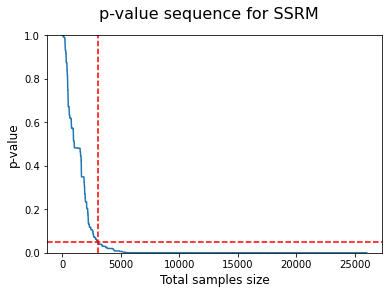

SRM detected after 3023 users joined experiment.
We were able to detect SRM after 11.62% of expected users joined our experiment.


In [26]:
# expected split ratio
expected_pct = [0.5, 0.5]

# real split ratio
observed = [df2['group'].value_counts()[0], df2['group'].value_counts()[1]]
total_traffic = sum(observed)
 
# a helper function to map our data
def map_value(value):
    if value == "['A']":
        return [1, 0]
    elif value == "['B']":
        return [0, 1]
    else:
        return None
    
# let's map our data to the required format
df2['data'] = df2['group'].apply(map_value)
data = df2['data'].to_list()
 
# calculating SSRM results
pvals = ssrm_test.sequential_p_values(data, expected_pct)
fig = plt.figure()
plt.plot(pvals)
fig.suptitle('p-value sequence for SSRM', fontsize=16)
plt.xlabel('Total samples size', fontsize=12)
plt.ylabel('p-value', fontsize=12)
plt.ylim(0, 1)
sig_reached = np.argmax(np.array(pvals) < 0.05)
plt.axhline(y=0.05, color='red', linestyle='--')
plt.axvline(x=sig_reached, color='red', linestyle='--')
plt.show()
 

print(f'SRM detected after {sig_reached} users joined experiment.')
print(f'We were able to detect SRM after {round(100 * sig_reached / total_traffic, 2)}% of expected users joined our experiment.')